In [24]:
import numpy as np
import matplotlib.pyplot as plt

import importlib
import phase_diagram as dpl
importlib.reload(dpl)  # handy while you edit the file

gh = dpl.GaussHermite.make(80)

def run_one_t(t, gh=gh):
    alpha_grid, T_grid = dpl.default_grids_for_t(t)
    res = dpl.compute_lines_for_t(t=t, alpha_grid=alpha_grid, T_grid=T_grid, gh=gh)
    return res

results = {t: run_one_t(t) for t in [0.0, 0.1, 0.5]}


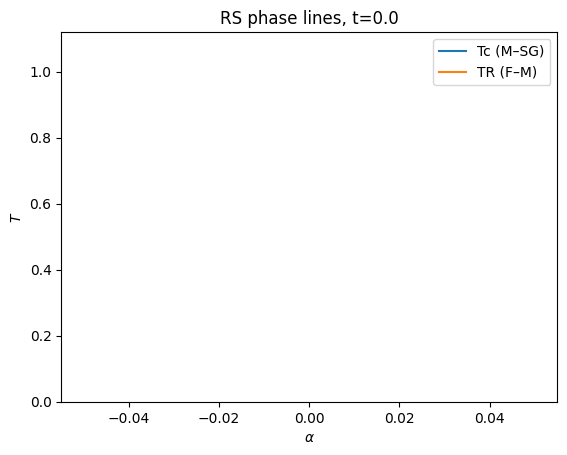

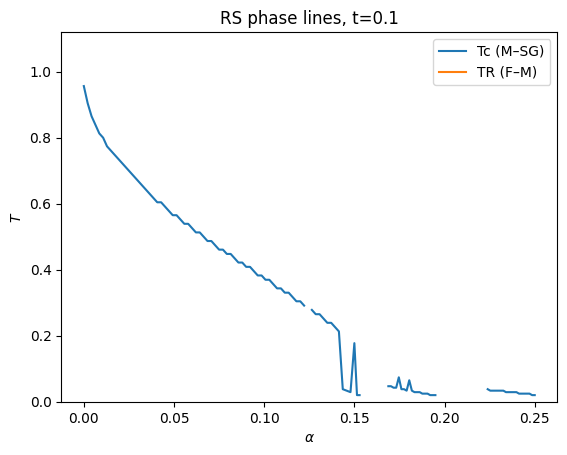

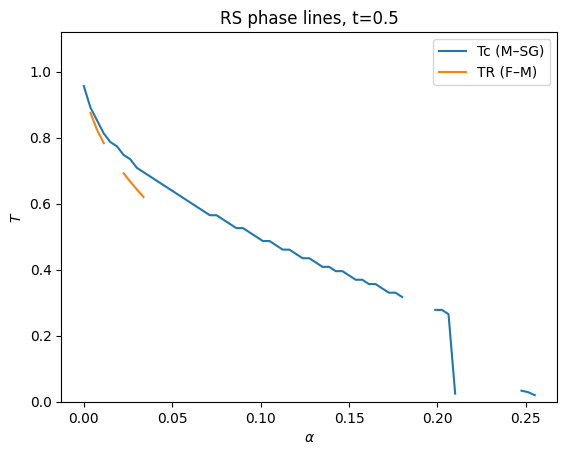

In [26]:

for t, res in results.items():
    a, TR, Tc = res["alpha"], res["TR"], res["Tc"]
    plt.figure()
    plt.plot(a, Tc, label="Tc (M–SG)")
    plt.plot(a, TR, label="TR (F–M)")
    plt.ylim(0.0, 1.12)
    plt.xlabel(r"$\alpha$")
    plt.ylabel(r"$T$")
    plt.title(f"RS phase lines, t={t}")
    plt.legend()
    plt.show()


In [21]:
t = 0.1
alpha = 0.02
T = 0.3   # don't start at 0.02 yet
gh = dpl.GaussHermite.make(120)

rR = dpl.solve_rs(alpha=alpha, T=T, t=t, branch="retr", gh=gh)
rS = dpl.solve_rs(alpha=alpha, T=T, t=t, branch="sg",   gh=gh)

print("retr ok:", rR.ok, "m:", (rR.state.m if rR.ok and t>0 else getattr(rR, "m", None)))
print("sg   ok:", rS.ok, "m:", (rS.state.m if rS.ok and t>0 else getattr(rS, "m", None)))


retr ok: False m: None
sg   ok: False m: None
